In [34]:
import psutil
import GPUtil

# CPU
cpu_count = psutil.cpu_count(logical=False)  # Physical CPU count
cpu_logical_count = psutil.cpu_count(logical=True)  # Logical CPU count

# RAM
total_memory = psutil.virtual_memory().total

# GPU
gpus = GPUtil.getGPUs()
gpu_info = []
for gpu in gpus:
    gpu_info.append({
        'id': gpu.id,
        'name': gpu.name,
        'memory_total': gpu.memoryTotal,
        'memory_used': gpu.memoryUsed,
        'memory_free': gpu.memoryFree,
        'temperature': gpu.temperature,
        'load': gpu.load
    })

print("CPU Physical Cores:", cpu_count)
print("CPU Logical Cores:", cpu_logical_count)
print("Total RAM:", total_memory)

print("\nGPU Information:")
for gpu in gpu_info:
    print("GPU ID:", gpu['id'])
    print("GPU Name:", gpu['name'])
    print("Total GPU Memory:", gpu['memory_total'])
    print("Used GPU Memory:", gpu['memory_used'])
    print("Free GPU Memory:", gpu['memory_free'])
    print("GPU Temperature:", gpu['temperature'])
    print("GPU Load:", gpu['load'])
    print("\n")


CPU Physical Cores: 18
CPU Logical Cores: 36
Total RAM: 134721097728

GPU Information:
GPU ID: 0
GPU Name: NVIDIA GeForce RTX 3090
Total GPU Memory: 24576.0
Used GPU Memory: 276.0
Free GPU Memory: 23983.0
GPU Temperature: 29.0
GPU Load: 0.0


GPU ID: 1
GPU Name: NVIDIA GeForce RTX 3090
Total GPU Memory: 24576.0
Used GPU Memory: 164.0
Free GPU Memory: 24086.0
GPU Temperature: 34.0
GPU Load: 0.0




In [35]:
!pip install gputil

In [36]:
import GPUtil

# Get the list of available GPUs
gpus = GPUtil.getGPUs()

# Print information for each GPU
for gpu in gpus:
    print(f"GPU Model: {gpu.name}")
    print(f"GPU ID: {gpu.id}")
    print(f"GPU Memory Total: {gpu.memoryTotal} MB")
    print(f"GPU Memory Free: {gpu.memoryFree} MB")
    print(f"GPU Memory Used: {gpu.memoryUsed} MB")
    print(f"GPU Driver: {gpu.driver}")
    print("\n" + "="*30 + "\n")


GPU Model: NVIDIA GeForce RTX 3090
GPU ID: 0
GPU Memory Total: 24576.0 MB
GPU Memory Free: 23983.0 MB
GPU Memory Used: 276.0 MB
GPU Driver: 535.161.07


GPU Model: NVIDIA GeForce RTX 3090
GPU ID: 1
GPU Memory Total: 24576.0 MB
GPU Memory Free: 24086.0 MB
GPU Memory Used: 164.0 MB
GPU Driver: 535.161.07




In [37]:
!pip install psutil

In [38]:
import psutil

# Get the total RAM in GB
ram_gb = psutil.virtual_memory().total / (1024 ** 3)

print(f"Total RAM: {ram_gb:.2f} GB")

Total RAM: 125.47 GB


In [39]:
import os

# Specify the path to the Downloads folder
dataset_dir = os.path.expanduser('~/Downloads/cifake')

print("Loading dataset from: " + dataset_dir)

# List all files and directories in the Downloads folder
folder_contents = os.listdir(dataset_dir)

# Store the items in a list
folder_items = []

for item in folder_contents:
    folder_items.append(item)

# Print the list of files and directories
print("Contents of the Downloads folder:")
for item in folder_items:
    print(item)


Loading dataset from: /home/mahin/Downloads/cifake
Contents of the Downloads folder:
train
test


In [60]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from IPython.display import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [61]:
print("ASD")

ASD


In [67]:
img_height = 32
img_width = 32
batch_size = 32
input_shape = (32, 32, 3)

# Load the training data
train_datagen = ImageDataGenerator(rescale=1./255)
train_ds = train_datagen.flow_from_directory(
  dataset_dir + "/train",
  seed = 512,
  target_size = (img_height, img_width),
  batch_size = batch_size)

# Load the validation data
val_datagen = ImageDataGenerator(rescale=1./255)
val_ds = val_datagen.flow_from_directory(
  dataset_dir + "/test",
  seed = 512,
  target_size = (img_height, img_width),
  batch_size = batch_size)

# Repeat the dataset indefinitely
train_dataset = tf.data.Dataset.from_generator(
    lambda: train_generator,
    output_types=(tf.float32, tf.float32),
    output_shapes=([None, input_shape[0], input_shape[1], input_shape[2]], [None])
).repeat()

val_dataset = tf.data.Dataset.from_generator(
    lambda: val_generator,
    output_types=(tf.float32, tf.float32),
    output_shapes=([None, input_shape[0], input_shape[1], input_shape[2]], [None])
).repeat()

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [68]:
print("ASD")

ASD


In [80]:
# Building the Transfer Learning model using ResNet50
ResNet_base_model = tf.keras.applications.ResNet50(
    include_top = False, 
    weights = 'imagenet', 
    input_shape = (img_height, img_width, 3),
    pooling = 'max'
)
ResNet_base_model.trainable = True

# Create a new model on top of the ResNet50 base
inputs = tf.keras.Input(shape = (img_height, img_width, 3))
x = ResNet_base_model(inputs, training = False)
x = BatchNormalization(axis = -1, momentum = 0.99, epsilon = 0.001)(x)
x = Dense(256, 
          kernel_regularizer = regularizers.l2(0.01), 
          activity_regularizer = regularizers.l1(0.01), 
          bias_regularizer = regularizers.l1(0.01),
          activation = 'relu')(x)
x = Dropout(rate = .4, seed = 512)(x)       
x = Dense(64, activation = 'relu')(x)
predictions = Dense(1, activation = 'sigmoid')(x)
ResNet_model = tf.keras.Model(inputs, outputs)

# Compile the model
ResNet_model.compile(
    optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.001),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy', 'precision', 'recall'],
)

# Summary of the model
ResNet_model.summary()

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11      │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resnet50            │ (None, 2048)      │ 23,587,712 │ input_layer_11[0… │
│ (Functional)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 2048)      │      8,192 │ resnet50[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 256)       │    524,544 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 256)       │          0 │ dense_15[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 64)        │     16,448 │ dropout_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_17      │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 2)         │        130 │ dense_16[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 24,137,026 (92.08 MB)

 Trainable params: 24,079,810 (91.86 MB)

 Non-trainable params: 57,216 (223.50 KB)

In [81]:
!pip install pydot

/home/mahin/Desktop/notebooks/Real and Ai Generated Image Detection/ResNet_model.png


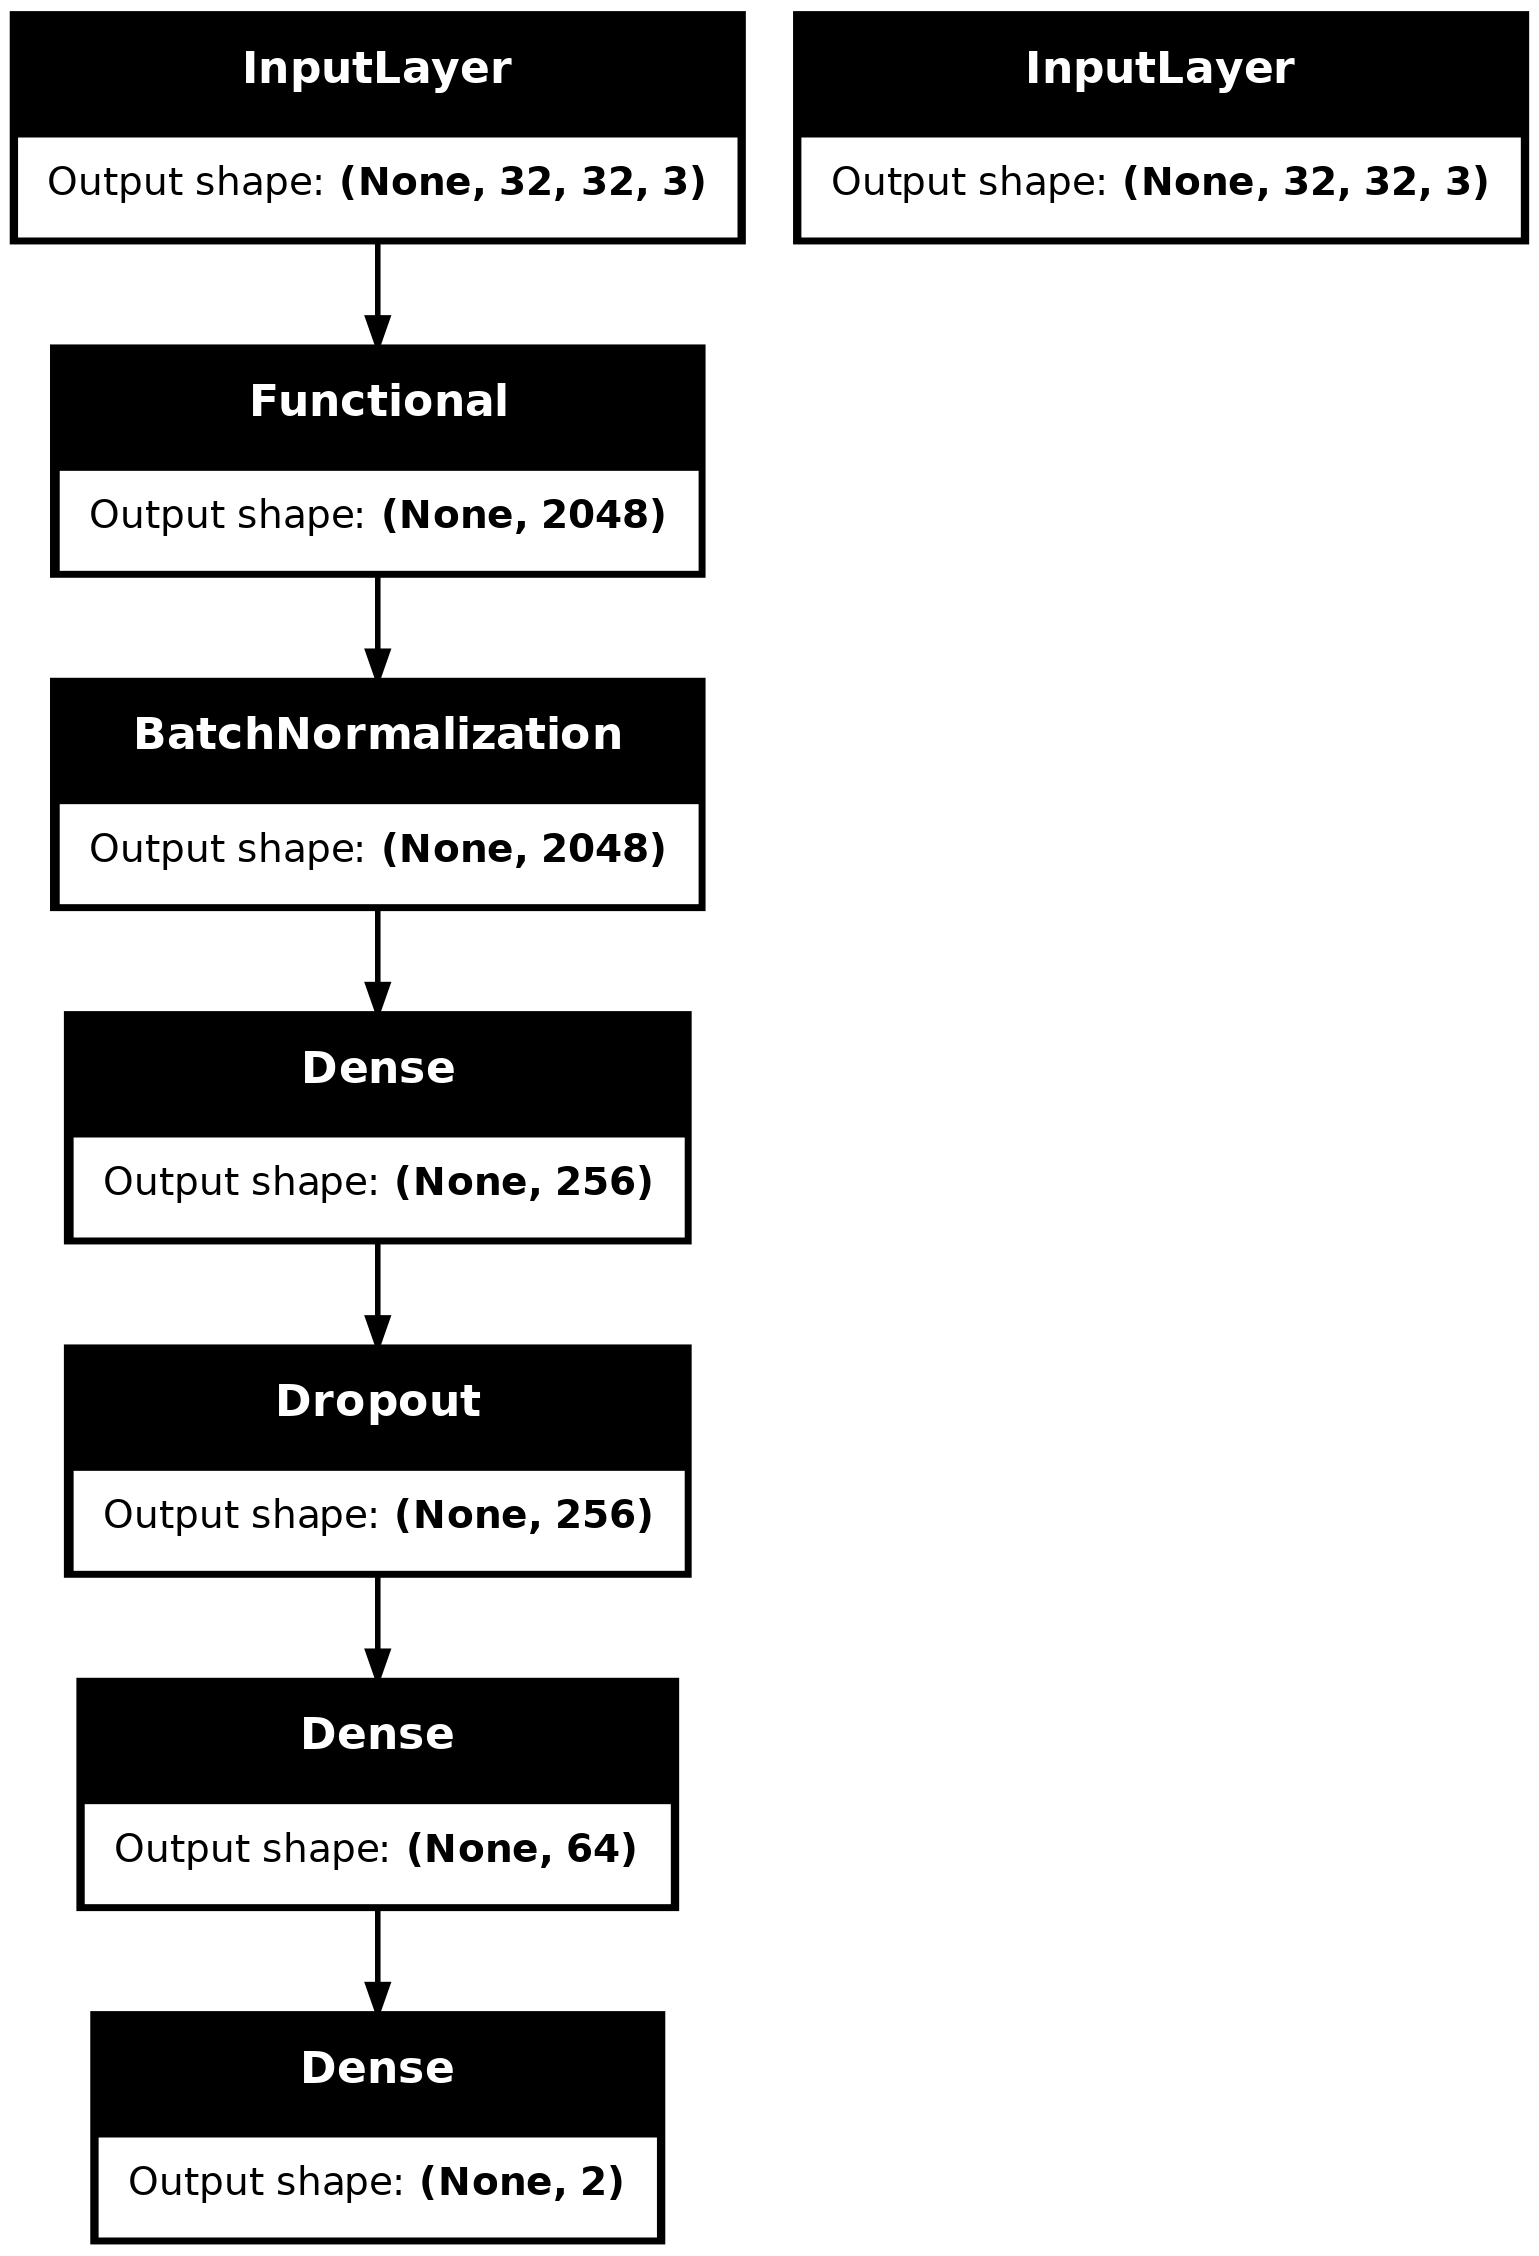

In [82]:
import os
import tensorflow as tf

# Define the directory where you want to save the image
save_dir = '/home/mahin/Desktop/notebooks/Real and Ai Generated Image Detection'

# Create the directory if it does not exist
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Define the full path of the image file
save_path = os.path.join(save_dir, 'ResNet_model.png')

print(save_path)

# Visualize the ResNet model architecture and save the image
tf.keras.utils.plot_model(ResNet_model, show_shapes=True, to_file=save_path)



In [83]:
print("ASD")

ASD


In [84]:
# Train the Transfer Learning model
print("Starting training with Transfer Learning using ResNet50...")
ResNet_model_history = ResNet_model.fit(
    train_dataset,
    validation_data = val_dataset,
    epochs = 2,
    steps_per_epoch=train_ds.samples // batch_size,
    validation_steps=val_ds.samples // batch_size,
)
print("Transfer Learning training finished.")

Starting training with Transfer Learning using ResNet50...
Epoch 1/2


KeyError: 'Exception encountered when calling Functional.call().\n\n\x1b[1m130444439088272\x1b[0m\n\nArguments received by Functional.call():\n  • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=float32)\n  • training=True\n  • mask=None'

In [ ]:
# Evaludate the model on the test dataset
val_loss, val_accuracy, val_precision, val_recall = ResNet_model.evaluate(val_ds)

# Plot the training and validation accuracy

train_loss = ResNet_model_history.history['loss']
val_loss = ResNet_model_history.history['val_loss']

# Plot the training and validation accuracy
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss using a logarithmic scale
plt.plot(range(1, len(train_loss) + 1), np.log(train_loss), label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), np.log(val_loss), label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.title('Training and Validation Loss (Log Scale)')
plt.legend()
plt.show()

# Save the accuracy plot as an image
plt.savefig('accuracy_plot.png', bbox_inches='tight')

# Calculate and display the best validation accuracy and loss
best_val_accuracy = max(val_accuracy)
best_val_loss = min(val_loss)
print(f'Best Validation Accuracy: {best_val_accuracy:.4f}')
print(f'Best Validation Loss: {best_val_loss:.4f}')

In [23]:
# Plot error rates and metric rates
plot_metrics(ResNet_model_history, 'loss')
plot_metrics(ResNet_model_history, 'accuracy')
plot_metrics(ResNet_model_history, 'precision')
plot_metrics(ResNet_model_history, 'recall')

NameError: name 'plot_metrics' is not defined

In [ ]:
# Plot the training and validation accuracy
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation accuracy
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss using a logarithmic scale
plt.plot(range(1, len(train_loss) + 1), np.log(train_loss), label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), np.log(val_loss), label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.title('Training and Validation Loss (Log Scale)')
plt.legend()
plt.show()

# Create the accuracy plot
plt.figure()
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
# Save the accuracy plot as an image
plt.savefig('accuracy_plot.png', bbox_inches='tight')

# Calculate and display the best validation accuracy and loss
best_val_accuracy = max(val_accuracy)
best_val_loss = min(val_loss)
print(f'Best Validation Accuracy: {best_val_accuracy:.4f}')
print(f'Best Validation Loss: {best_val_loss:.4f}')

In [ ]:
import os
import numpy as np
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix

# Define the input shape and number of classes (Make sure to use the same values as in the training)
input_shape = (224, 224, 3)
num_classes = 5

# Create data generator for testing data
test_data_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_data_gen.flow_from_directory(
    train_data_dir,
    target_size=input_shape[:2],
    batch_size=32,
    class_mode='sparse',
    subset='training',  
    shuffle=False  
)

# Get the true labels for the test data
true_labels = test_generator.classes

# Get the predictions for the test data
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate and print classification report
class_names = list(test_generator.class_indices.keys())
print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=class_names))

# Calculate and plot confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Create an annotation array with the same shape as your confusion matrix
annot_array = np.array([['0' if item == 0 else str(item) for item in row] for row in cm])

# Create the confusion matrix plot manually
fig, ax = plt.subplots(figsize=(10, 8))

# Set the colormap
cmap = plt.cm.Blues

# Normalize the confusion matrix data
normed_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# This is the colormap I'd like to use.
cmap = sns.color_palette("Blues", as_cmap=True)

# Plot the heatmap
ax.imshow(normed_cm, interpolation='nearest', cmap=cmap)

# Add the color bar
cbar = ax.figure.colorbar(ax.imshow(normed_cm, interpolation='nearest', cmap=cmap), ax=ax)
cbar.ax.set_ylabel('Relative Frequency', rotation=-90, va="bottom")

# Add the text annotations.
thresh = normed_cm.max() / 1.5
for i in range(normed_cm.shape[0]):
    for j in range(normed_cm.shape[1]):
        ax.text(j, i, annot_array[i, j],
                ha="center", va="center",
                color="white" if normed_cm[i, j] > thresh else "black")

# Set the ticks and labels.
ax.set_xticks(np.arange(num_classes))
ax.set_yticks(np.arange(num_classes))
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Set labels and title
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Custom Confusion Matrix')

# Show the plot
plt.show()



# Get the true and predicted class distributions
true_class_distribution = np.bincount(true_labels, minlength=num_classes)
predicted_class_distribution = np.bincount(predicted_labels, minlength=num_classes)

print("True class distribution:")
print(dict(zip(class_names, true_class_distribution)))

print("Predicted class distribution:")
print(dict(zip(class_names, predicted_class_distribution)))

